In [1]:
import pandas as pd
import numpy as np 
from scipy import stats

from scipy import stats
from statsmodels.stats import weightstats as wsm
from statsmodels.stats.proportion import proportion_confint

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

Для выполнения этого задания вам понадобятся данные о кредитных историях клиентов одного из банков. Поля в предоставляемых данных имеют следующий смысл:

1. LIMIT_BAL: размер кредитного лимита (в том числе и на семью клиента)
2. SEX: пол клиента (1 = мужской, 2 = женский )
3. EDUCATION: образование (0 = доктор, 1 = магистр; 2 = бакалавр; 3 = выпускник школы; 4 = начальное образование; 5= прочее; 6 = нет данных ).
4. MARRIAGE: (0 = отказываюсь отвечать; 1 = замужем/женат; 2 = холост; 3 = нет данных).
5. AGE: возраст в годах
6. PAY_0 - PAY_6 : История прошлых платежей по кредиту. PAY_6 - платеж в апреле, ... Pay_0 - платеж в сентябре. Платеж = (0 = исправный платеж, 1=задержка в один месяц, 2=задержка в 2 месяца ...)
7. BILL_AMT1 - BILL_AMT6: задолженность, BILL_AMT6 - на апрель, BILL_AMT1 - на сентябрь
8. PAY_AMT1 - PAY_AMT6: сумма уплаченная в PAY_AMT6 - апреле, ..., PAY_AMT1 - сентябре
9. default - индикатор невозврата денежных средств

In [2]:
data = pd.read_csv('credit_card_default_analysis.csv')

In [3]:
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,0,0,0,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


### Задание


1. Размер кредитного лимита (LIMIT_BAL). В двух группах, тех людей, кто вернул кредит (default = 0) и тех, кто его не вернул (default = 1) проверьте гипотезы: a) о равенстве медианных значений кредитного лимита с помощью подходящей интервальной оценки b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних. Значимы ли полученные результаты с практической точки зрения ?
2. Пол (SEX): Проверьте гипотезу о том, что гендерный состав группы людей вернувших и не вернувших кредит отличается. Хорошо, если вы предоставите несколько различных решений этой задачи (с помощью доверительного интервала и подходящего статистического критерия)
3. Образование (EDUCATION): Проверьте гипотезу о том, что образование не влияет на то, вернет ли человек долг. Предложите способ наглядного представления разницы в ожидаемых и наблюдаемых значениях количества человек вернувших и не вернувших долг. Например, составьте таблицу сопряженности "образование" на "возврат долга", где значением ячейки была бы разность между наблюдаемым и ожидаемым количеством человек. Как бы вы предложили модифицировать таблицу так, чтобы привести значения ячеек к одному масштабу не потеряв в интерпретируемости ? Наличие какого образования является наилучшим индикатором того, что человек отдаст долг ? наоборт, не отдаст долг ?
4. Семейное положение (MARRIAGE): Проверьте, как связан семейный статус с индикатором дефолта: нужно предложить меру, по которой можно измерить возможную связь этих переменных и посчитать ее значение.
5. Возраст (AGE): Относительно двух групп людей вернувших и не вернувших кредит проверьте следующие гипотезы: a) о равенстве медианных значений возрастов людей b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних. Значимы ли полученные результаты с практической точки зрения ?

In [4]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,0.356767,0.320033,0.304067,0.258767,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,0.760594,0.801727,0.790589,0.761113,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,0.000000,0.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


### В двух группах, тех людей, кто вернул кредит (default = 0) и тех, кто его не вернул (default = 1) проверьте гипотезы:

#### a) о равенстве медианных значений кредитного лимита с помощью подходящей интервальной оценки

#### b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних. Значимы ли полученные результаты с практической точки зрения ?

In [5]:
credit_good = data[data['default'] == 0]
credit_bad = data[data['default'] == 1]

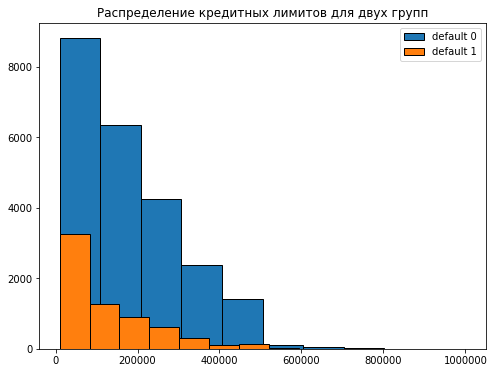

Как видно из гистограммы - люди стараются возвращать кредиты на большую сумму. И наоборот, доля не возвращенных кредитов на небольшую сумму довольно высока


In [6]:
plt.figure(figsize = (8,6))
plt.hist(credit_good['LIMIT_BAL'], edgecolor='k', bins = 10, label = 'default 0')
plt.hist(credit_bad['LIMIT_BAL'],  edgecolor='k', bins = 10, label = 'default 1')
plt.title('Распределение кредитных лимитов для двух групп')
plt.legend(loc='best')
plt.show()

print('Как видно из гистограммы - люди стараются возвращать кредиты на большую сумму. \
И наоборот, доля не возвращенных кредитов на небольшую сумму довольно высока')

Нужно проверить гипотезу о равенстве медианных значений двух выборок.\
$H_0:$ медианы двух выборок равны\
$H_1:$ медианы двух выборок не равны\
Используем подходящую интервальную оценку - биномиальный критерий. 

In [7]:
#берем готовую функцию с семинара первой недели
def zconfint_binom(n, p, alpha=0.05):
    q = 1 - p
    m = n * p
    var = n * p * q
    z_stat = stats.norm.ppf(1 - alpha / 2)
    l_bound = int(round(m - z_stat * np.sqrt(var)))
    u_bound = int(round(m + z_stat * np.sqrt(var)))
    return (l_bound, u_bound)

In [8]:
values_1 = np.array(sorted(credit_good['LIMIT_BAL'].values))
values_2 = np.array(sorted(credit_bad['LIMIT_BAL'].values))

print('confint 1:[%d, %d]' %(values_1[zconfint_binom(len(values_1), p=0.5)[0]],
      values_1[zconfint_binom(len(values_1), p=0.5)[1]]))
print('confint 2:[%d, %d]' %(values_2[zconfint_binom(len(values_2), p=0.5)[0]],
      values_2[zconfint_binom(len(values_2), p=0.5)[1]]))

confint 1:[150000, 150000]
confint 2:[80000, 90000]


Видно, что интервалы не совпадают. Отсюда можно сделать вывод, что наша нулевая гипотеза неверна.

Теперь проверим гипотезу о равенстве распределений с помощью непараметрического критерия проверки равенства средних. В данном случае удобно использовать перестановочный критерий. 

Все необходимые для него функции реализованы в учебном ноутбуке $\textbf{stat.non_parametric_tests_ind}$

Итак, наши гипотезы:

$H_0\colon F_{X_1}(x) = F_{X_2}(x)$

$H_1\colon F_{X_1}(x) = F_{X_2}(x + \Delta), \Delta\neq 0$

In [9]:
def permutation_t_stat_ind(sample1, sample2):
    return np.mean(sample1) - np.mean(sample2)

def get_random_combinations(n1, n2, max_combinations):
    index = list(range(n1 + n2))
    indices = set([tuple(index)])
    for i in range(max_combinations - 1):
        np.random.shuffle(index)
        indices.add(tuple(index))
    return [(index[:n1], index[n1:]) for index in indices]

def permutation_zero_dist_ind(sample1, sample2, max_combinations = None):
    joined_sample = np.hstack((sample1, sample2))
    n1 = len(sample1)
    n = len(joined_sample)
    
    if max_combinations:
        indices = get_random_combinations(n1, len(sample2), max_combinations)
    else:
        indices = [(list(index), filter(lambda i: i not in index, range(n))) \
                    for index in itertools.combinations(range(n), n1)]
    
    distr = [joined_sample[list(i[0])].mean() - joined_sample[list(i[1])].mean() \
             for i in indices]
    return distr

def permutation_test(sample, mean, max_permutations = None, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    t_stat = permutation_t_stat_ind(sample, mean)
    
    zero_distr = permutation_zero_dist_ind(sample, mean, max_permutations)
    
    if alternative == 'two-sided':
        return sum([1. if abs(x) >= abs(t_stat) else 0. for x in zero_distr]) / len(zero_distr)
    
    if alternative == 'less':
        return sum([1. if x <= t_stat else 0. for x in zero_distr]) / len(zero_distr)

    if alternative == 'greater':
        return sum([1. if x >= t_stat else 0. for x in zero_distr]) / len(zero_distr)

Вычислим достигаемый уровень значимости "p-value", если он окажется $>0.05$, то гипотезу о равенстве распределений нельзя будет отвергнуть. 

In [10]:
print('p-value:', permutation_test(values_1, values_2, max_permutations=1000))

p-value: 0.001


Как видно, нулевая гипотеза отвергается на уровне значимости $0.05$

### Пол (SEX)

#### Проверьте гипотезу о том, что гендерный состав группы людей вернувших и не вернувших кредит отличается. Хорошо, если вы предоставите несколько различных решений этой задачи (с помощью доверительного интервала и подходящего статистического критерия)

In [11]:
#зададим функцию для разности долей независимых выборок
def proportions_confint_diff_ind(sample1, sample2, alpha = 0.05):    
    z = stats.norm.ppf(1 - alpha / 2.)   
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1) / len(sample1) + p2 * (1 - p2) / len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1) / len(sample1) + p2 * (1 - p2) / len(sample2))
    
    return (left_boundary, right_boundary)

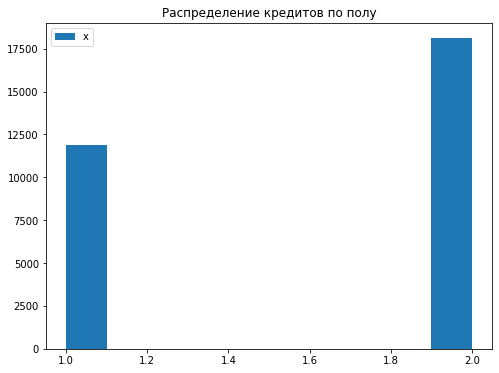

In [12]:
plt.figure(figsize = (8,6))
plt.hist(data['SEX'], label ='x')
plt.legend()
plt.title('Распределение кредитов по полу')
plt.show()

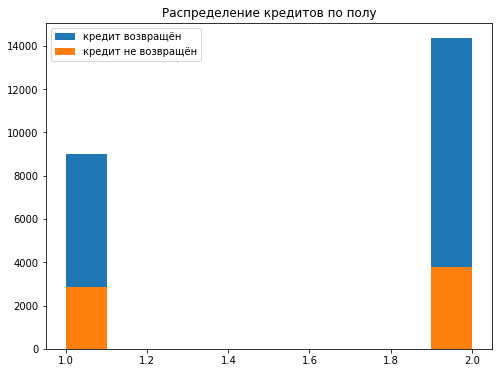

In [13]:
plt.figure(figsize = (8,6))
plt.hist(data[data['default']==0]['SEX'], label='кредит возвращён')
plt.hist(data[data['default']==1]['SEX'], label='кредит не возвращён')
plt.title('Распределение кредитов по полу')
plt.legend(loc = 'best')
plt.show()

In [14]:
sex_def_0 = data[data['default']==0]['SEX']
sex_def_1 = data[data['default']==1]['SEX']

men_to_women_0 = np.where(sex_def_0 == 1)[0].shape[0] / sex_def_0.shape[0]
men_to_women_1 = np.where(sex_def_1 == 1)[0].shape[0] / sex_def_1.shape[0]

print('men/women (default = 0)', round(men_to_women_0, 4))
print('men/women (default = 1)', round(men_to_women_1,4))

men/women (default = 0) 0.3859
men/women (default = 1) 0.4329


In [15]:
conf_int_0 = proportion_confint(np.where(sex_def_0 == 1)[0].shape[0], sex_def_0.shape[0])
conf_int_1 = proportion_confint(np.where(sex_def_1 == 1)[0].shape[0], sex_def_1.shape[0])

print('confidence interval [%.4f, %.4f]' %conf_int_0)
print('confidence interval [%.4f, %.4f]' %conf_int_1)

confidence interval [0.3796, 0.3921]
confidence interval [0.4210, 0.4449]


Интервалы не пересекаются, значит наша гипотеза о различии гендерного состава верна.

In [17]:
print('Confidence interval for difference of independent datasets [%.4f, %.4f]' 
      %proportions_confint_diff_ind(np.abs(sex_def_0.values-2), np.abs(sex_def_1.values-2)))

Confidence interval for difference of independent datasets [-0.0605, -0.0336]


Теперь проверим эту же гипотезу против двусторонней альтернативы:

$H_0 =$ гендерный состав не отличается\
$H_1 =$ гендерный состав отличается (мужчин больше, либо женщин больше)

Чтобы использовать $Z$-критерий, сперва проверим выборки на нормальность методом Шапиро-Уилка.

In [22]:
print(stats.shapiro(sex_def_0)[0],stats.shapiro(sex_def_1)[0])

0.617315411567688 0.6301405429840088


In [24]:
def proportions_diff_z_stat_ind(sample1, sample2):
    n1 = len(sample1)
    n2 = len(sample2)
    
    p1 = float(sum(sample1)) / n1
    p2 = float(sum(sample2)) / n2 
    P = float(p1*n1 + p2*n2) / (n1 + n2)
    
    return (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))

def proportions_diff_z_test(z_stat, alternative='two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - stats.norm.cdf(z_stat)

In [32]:
print('p-value: %.20f' 
      %proportions_diff_z_test(proportions_diff_z_stat_ind(abs(sex_def_0-2), abs(sex_def_1-2))))

p-value: 0.00000000000447286652


Очевидно, гипотеза отвергается на уровне значимости $0.05$

### Образование (EDUCATION)

#### Проверьте гипотезу о том, что образование не влияет на то, вернет ли человек долг. 
#### Предложите способ наглядного представления разницы в ожидаемых и наблюдаемых значениях количества человек вернувших и не вернувших долг. 
#### Например, составьте таблицу сопряженности "образование" на "возврат долга", где значением ячейки была бы разность между наблюдаемым и ожидаемым количеством человек. 
#### Как бы вы предложили модифицировать таблицу так, чтобы привести значения ячеек к одному масштабу не потеряв в интерпретируемости ? Наличие какого образования является наилучшим индикатором того, что человек отдаст долг ? наоборт, не отдаст долг ?

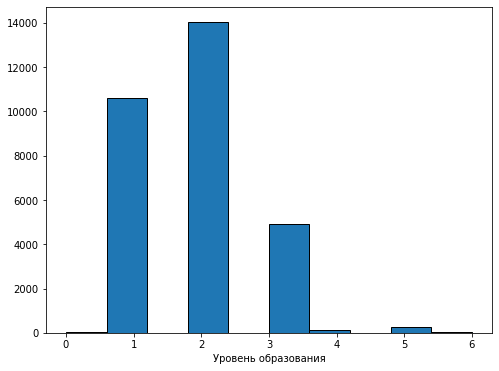

In [100]:
plt.figure(figsize = (8,6))
plt.hist(data['EDUCATION'],edgecolor = 'k')
plt.xlabel('Уровень образования')
plt.show()

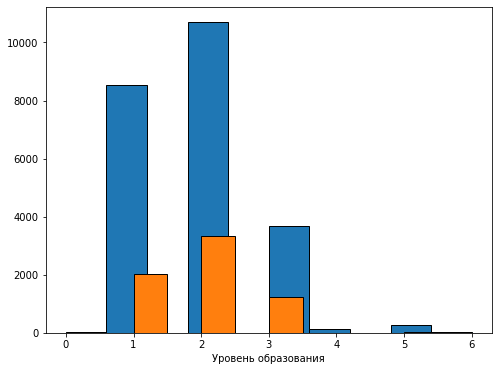

In [99]:
plt.figure(figsize = (8,6))
plt.hist(data[data['default']==0]['EDUCATION'], label='кредит возвращён',edgecolor = 'k')
plt.hist(data[data['default']==1]['EDUCATION'], label='кредит не возвращён',edgecolor = 'k')
plt.xlabel('Уровень образования')
plt.show()

Чтобы проверить гипотезу о том, что образование не влияет на то, вернет ли человек долг, посмотрим, какую долю составляют не вернувшие долг для каждой группы по образованию.

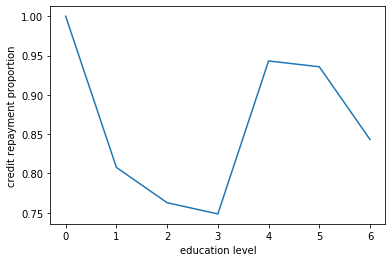

In [90]:
vals = list(data['EDUCATION'].value_counts().sort_index())
arr1 = []
for j in list(data['EDUCATION'].value_counts().sort_index().axes[0]):
    arr1.append(data[(data['EDUCATION']==j)&(data['default']==1)].shape[0])
dots = []
for i in range(len(vals)):
    dots.append((vals[i]-arr1[i])/vals[i])

plt.plot(np.arange(len(dots)), dots)
plt.xlabel('education level')
plt.ylabel('credit repayment proportion')
plt.show()   

Если бы гипотеза была верна, то график относительных погашений кредитов был бы схож с графиком плотности нормального распрделения, чего не наблюдается. Подтвердим наблюдения более точными статистическими методами.

In [94]:
print('средний процент возврата кредита по всем уровням образования:',round(np.mean(dots),2))

средний процент возврата кредита по всем уровням образования: 0.86


In [177]:
ed0 = data[data['default']==0]['EDUCATION']
ed1 = data[data['default']==1]['EDUCATION']

In [180]:
education_0 = np.array([ed0[ed0 == i].shape[0] for i in range(7)])
education_1 = np.array([ed1[ed1 == i].shape[0] for i in range(7)])

for i in range(7):
    print('уровень образования %d: %d/%d, %d' %(i, education_0[i], education_1[i], education_0[i]+education_1[i]))

уровень образования 0: 14/0, 14
уровень образования 1: 8549/2036, 10585
уровень образования 2: 10700/3330, 14030
уровень образования 3: 3680/1237, 4917
уровень образования 4: 116/7, 123
уровень образования 5: 262/18, 280
уровень образования 6: 43/8, 51


Теперь зададим ожидаемые частоты возврата кредитов в соответствии с нашей гипотезой. И покажем разницу с фактической частотой.

In [182]:
norm_frequency = np.array([np.mean(dots) * (education_0[i]+education_1[i]) for i in range(7)])

for i in range(7):
    print('уровень образования %d. Oжидаемое значение:%d, фактическое значение: %d' %(i, norm_frequency[i], education_1[i]) )

уровень образования 0. Oжидаемое значение:12, фактическое значение: 0
уровень образования 1. Oжидаемое значение:9134, фактическое значение: 2036
уровень образования 2. Oжидаемое значение:12107, фактическое значение: 3330
уровень образования 3. Oжидаемое значение:4243, фактическое значение: 1237
уровень образования 4. Oжидаемое значение:106, фактическое значение: 7
уровень образования 5. Oжидаемое значение:241, фактическое значение: 18
уровень образования 6. Oжидаемое значение:44, фактическое значение: 8


In [184]:
print('p-value = %.4f' %stats.chisquare(education_0, norm_frequency, ddof = 1)[1])

p-value = 0.0000


### Семейное положение (MARRIAGE)

#### Проверьте, как связан семейный статус с индикатором дефолта: нужно предложить меру, по которой можно измерить возможную связь этих переменных и посчитать ее значение.

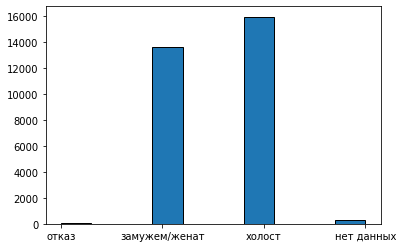

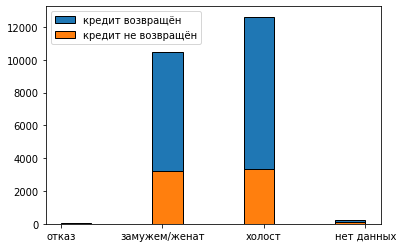

In [104]:
plt.hist(data['MARRIAGE'],edgecolor = 'k')
plt.xticks(np.arange(0,4),['отказ', 'замужем/женат','холост','нет данных'])
plt.show()

plt.hist(data[data['default']==0]['MARRIAGE'], label= 'кредит возвращён', edgecolor = 'k')
plt.hist(data[data['default']==1]['MARRIAGE'],  label= 'кредит не возвращён', edgecolor = 'k')
plt.xticks(np.arange(0,4),['отказ', 'замужем/женат','холост','нет данных'])
plt.legend(loc='best')
plt.show()

In [106]:
marriage0 = data[data['default']==0]['MARRIAGE']
marriage1 = data[data['default']==1]['MARRIAGE']

In [142]:
conj = np.zeros((4,2))
for i in range(len(list(data['MARRIAGE'].value_counts()))):
    conj[i,0] = len(marriage0.loc[marriage0 == i])
    conj[i,1] = len(marriage1.loc[marriage1 == i])

Для составленной таблицы сопряжённости применим метод Крамера. Вспользуемся уже готовой функцией с семинара.

In [146]:
def cramers_stat(confusion_matrix):
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    return np.sqrt(chi2 / (n*(min(confusion_matrix.shape)-1)))

In [151]:
print("Cramer's coef =", cramers_stat(conj))

Cramer's coef = 0.034478203662766466


Выдержка из конспекта третьей недели: "Коэффициент Крамера принимает значения исключительно в интервале от 0 до 1, то есть он не может быть
отрицательным. 0, как и раньше, соответствует полному отсутствию взаимосвязи, а 1 — полному совпадению
переменных $X_1$ и $X_2$ с точностью до переименования уровней."

Так как в нашем случае коэффициент достаточно близок к нулю, делаем вывод, что семейный статус не связан с индикатором дефолта.

### Возраст (AGE)

#### Относительно двух групп людей вернувших и не вернувших кредит проверьте следующие гипотезы:

#### a) о равенстве медианных значений возрастов людей 

#### b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних. Значимы ли полученные результаты с практической точки зрения ?

In [153]:
age_0 = data[data['default']==0]['AGE']
age_1 = data[data['default']==1]['AGE']

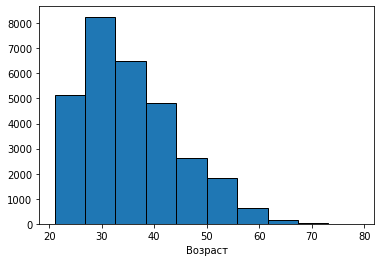

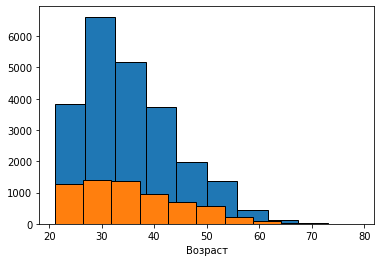

In [162]:
plt.hist(data['AGE'], edgecolor='k')
plt.xlabel('Возраст')
plt.show()

plt.hist(age_0, edgecolor='k')
plt.hist(age_1, edgecolor='k')
plt.xlabel('Возраст')
plt.show()

In [164]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [171]:
age0_bootstrap = list(map(np.median,get_bootstrap_samples(age_0.values, 100)))
age1_bootstrap = list(map(np.median,get_bootstrap_samples(age_1.values, 100)))

print('Доверительный интервал для медианы возраста (default=0): [%d; %d]' % (stat_intervals(age0_bootstrap, 0.05)[0],
                                                           stat_intervals(age0_bootstrap, 0.05)[1]))
print('Доверительный интервал для медианы возраста (default=1): [%d; %d]' % (stat_intervals(age1_bootstrap, 0.05)[0],
                                                           stat_intervals(age1_bootstrap, 0.05)[1]))

Доверительный интервал для медианы возраста (default=0): [34; 34]
Доверительный интервал для медианы возраста (default=1): [34; 35]


Интервалы пересекаются.

Чтобы окончательно убедиться в равенстве медиан, построим интервальную оценку разности медиан.

In [175]:
delta_median = list(map(lambda x: x[1] - x[0], zip(age0_bootstrap,age1_bootstrap)))

print('[%d;%d]' %(stat_intervals(delta_median, 0.05)[0],stat_intervals(delta_median, 0.05)[1]))

[0;1]


Интервал содержит ноль, поэтому гипотеза о равенстве медиан верна.